<a href="https://colab.research.google.com/github/gayathri1462/Hello-ML/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [ ]:
df = pd.read_csv('penguins.csv')
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
df = pd.read_csv('penguins.csv')
df = df.fillna(0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
df = pd.read_csv('penguins.csv')

df['bill_length_mm'].fillna((df['bill_length_mm'].mean()), inplace=True)
df['bill_depth_mm'].fillna((df['bill_depth_mm'].mean()), inplace=True)
df['flipper_length_mm'].fillna((df['flipper_length_mm'].mean()), inplace=True)
df['body_mass_g'].fillna((df['body_mass_g'].mean()), inplace=True)

df['sex'].fillna((df['sex'].value_counts().index[0]), inplace=True)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [ ]:
df["species"] = df["species"].astype('category')
df["island"] = df["island"].astype('category')
df["sex"] = df["sex"].astype('category')
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [ ]:
categorical_data = df.drop(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year' ], axis=1)
categorical_data.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,male
4,Adelie,Torgersen,female


In [ ]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,male,0,2,1
1,Adelie,Torgersen,female,0,2,0
2,Adelie,Torgersen,female,0,2,0
3,Adelie,Torgersen,male,0,2,1
4,Adelie,Torgersen,female,0,2,0


In [ ]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

In [ ]:
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,female,male
0,Adelie,Torgersen,male,0,2,1,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,female,0,2,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,female,0,2,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,male,0,2,1,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,female,0,2,0,1,0,0,0,0,1,1,0


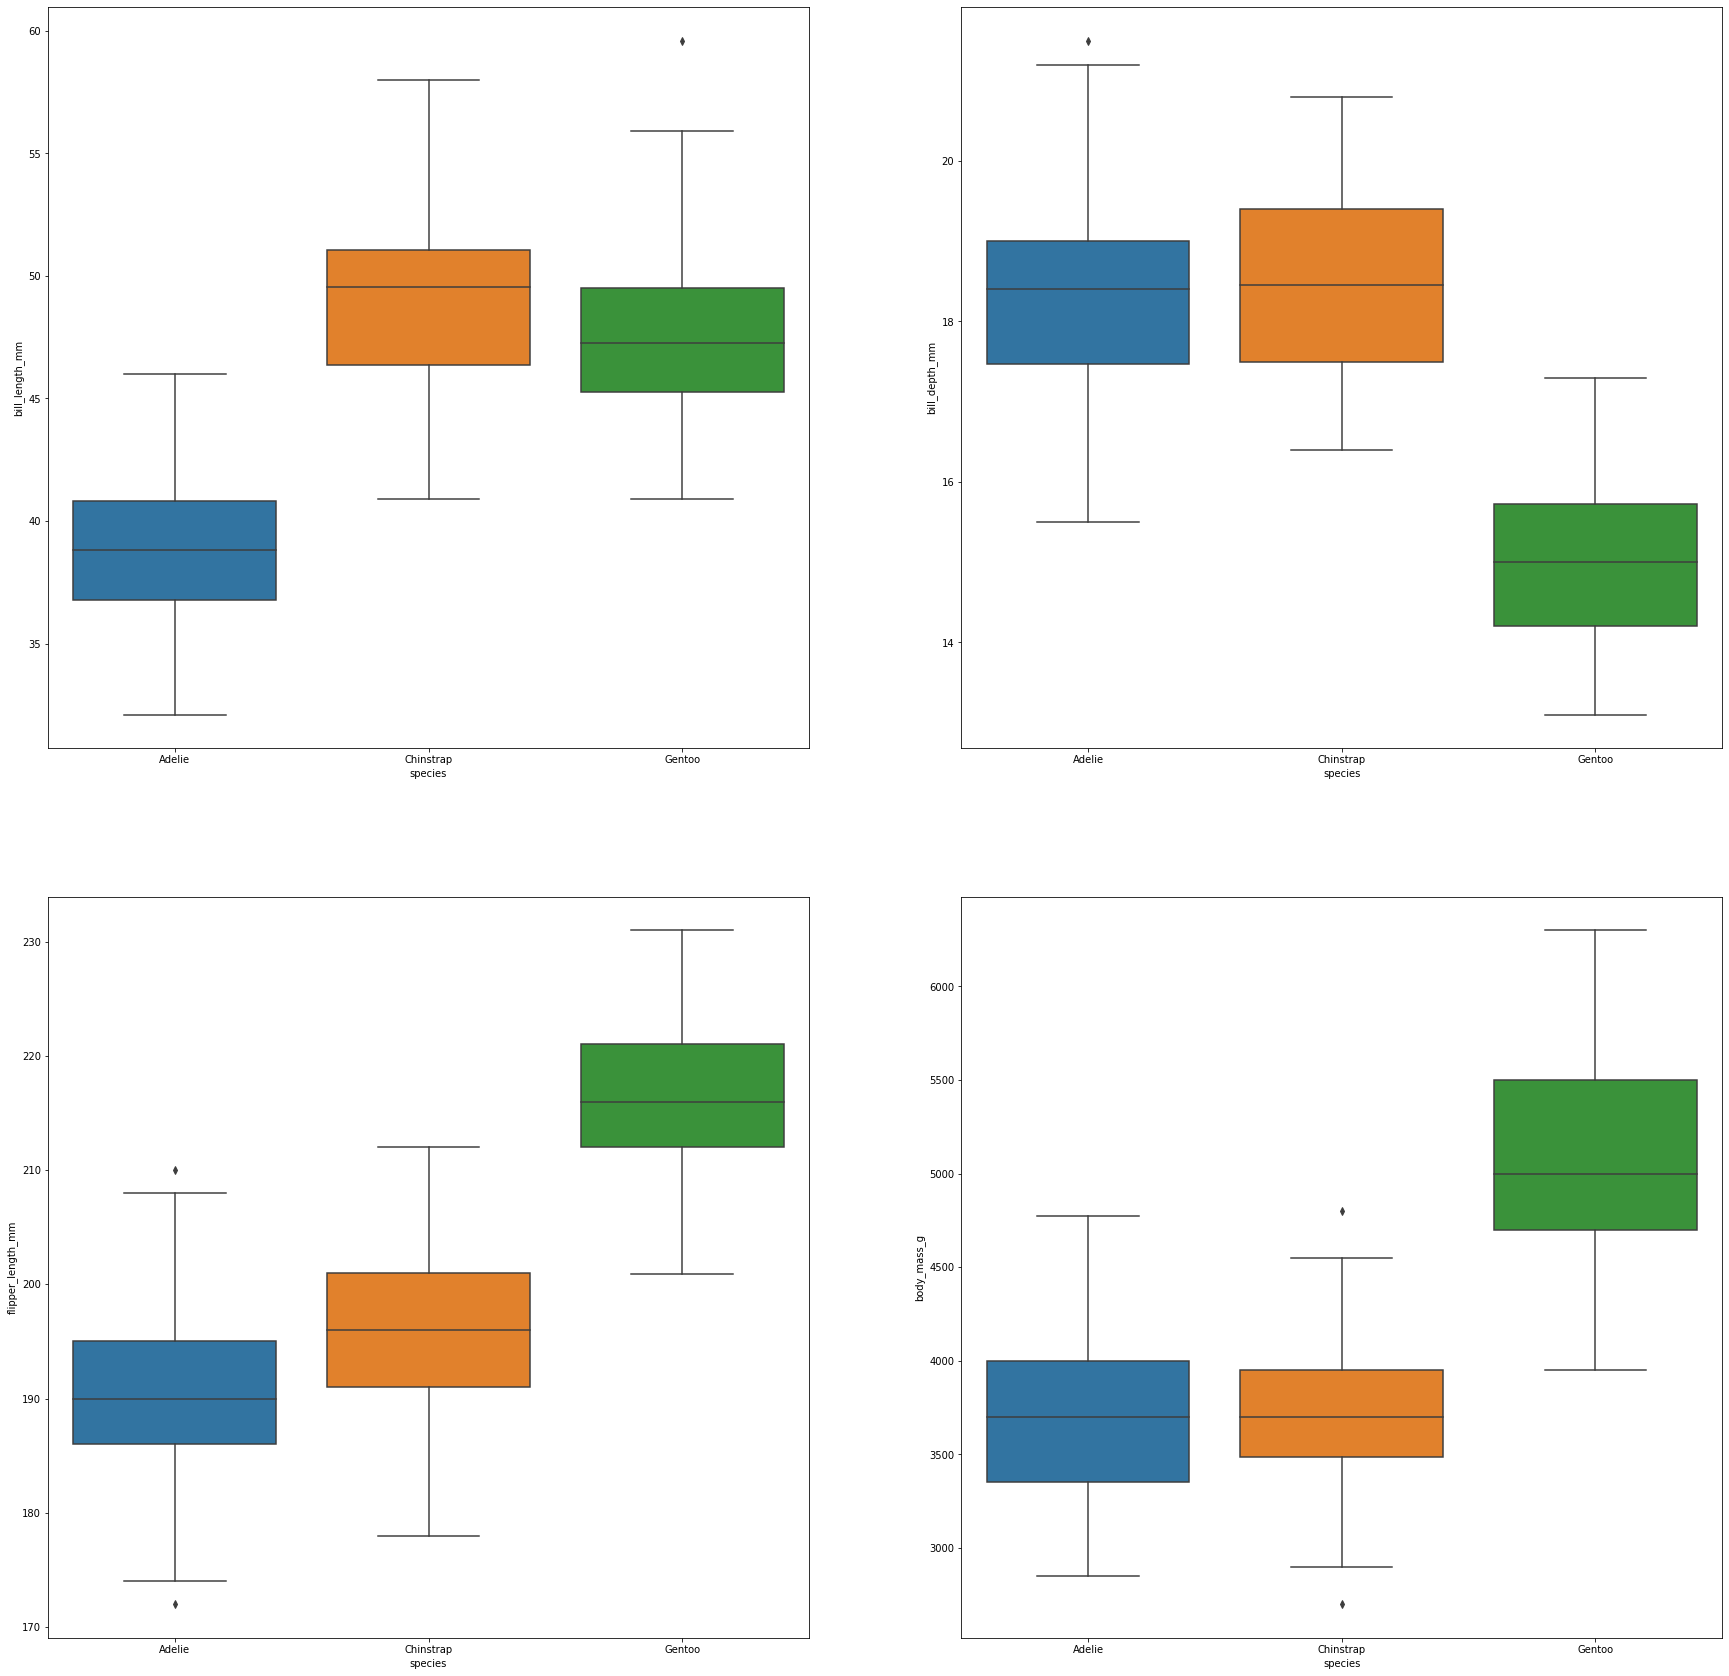

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30, 30)
sns.boxplot(data=df,y="bill_length_mm",x="species",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="bill_depth_mm",x="species",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="flipper_length_mm",x="species",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="body_mass_g",x="species",orient="v",ax=axes[1][1])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
bin_data = df[['bill_length_mm']]
bin_data['bill_length_bin'] = pd.cut(df['bill_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bill_length_mm,bill_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Mid
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,55.80000,High
340,43.50000,Mid
341,49.60000,Mid
342,50.80000,High


In [ ]:
scaled_data = df[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4201.754385964912
Standard Deviation: 799.6130576037643


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.41715399610136483
Standard Deviation: 0.2221147382232677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


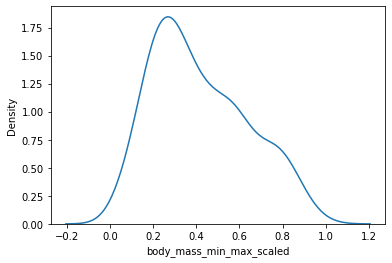

In [ ]:
sns.kdeplot(data=scaled_data, x="body_mass_min_max_scaled")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()